## 통계분석(빈도주의적 관점 vs 베이지안적 관점)
## 그룹분석

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tips = sns.load_dataset('tips')

### 식당에서 식사 후 내는 팁(tip)과 관련된 데이터

​

total_bill: 식사대금

tip: 팁

sex: 성별

smoker: 흡연/금연 여부

day: 요일

time: 시간

size: 인원

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 범주형 변수 : sex, smoker, day, time
# 빈도분석

In [8]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [9]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [10]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [11]:
tips.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

In [12]:
tips.groupby('smoker').size()

smoker
Yes     93
No     151
dtype: int64

In [13]:
tips.groupby('day').size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [14]:
tips.groupby('time').size()

time
Lunch      68
Dinner    176
dtype: int64

# 교차분석 

In [17]:
pd.crosstab(tips['sex'], tips['smoker'], margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [18]:
tips.groupby(['sex','smoker']).size()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

In [19]:
pd.crosstab(tips.sex, tips.day, margins=True)

day,Thur,Fri,Sat,Sun,All
sex,,,,,
Male,30,10,59,58,157
Female,32,9,28,18,87
All,62,19,87,76,244


In [20]:
pd.crosstab(tips.sex, tips.time, margins=True)

time,Lunch,Dinner,All
sex,,,
Male,33,124,157
Female,35,52,87
All,68,176,244


# 시각화

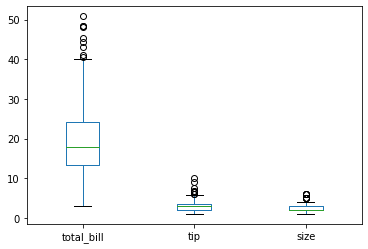

In [21]:
tips.plot(kind='box')

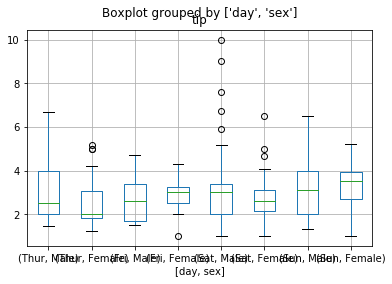

In [22]:
tips.boxplot(column=['tip'], by=['day','sex'])
plt.show()

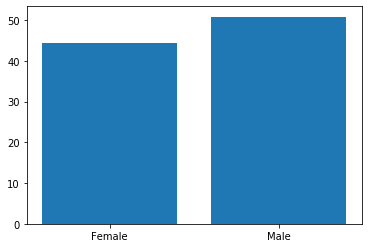

In [24]:
plt.bar(tips.sex, tips.total_bill)
plt.show()

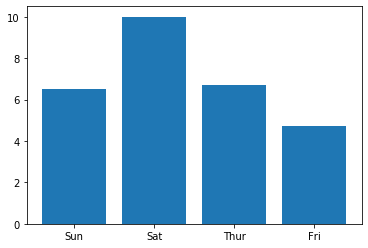

In [27]:
plt.bar(tips.day, tips.tip)
plt.show()

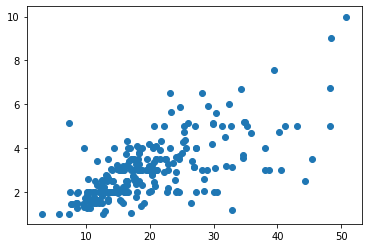

In [29]:
plt.scatter(tips.total_bill, tips.tip)
plt.show()

In [32]:
tip_corr= tips.corr()
tip_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


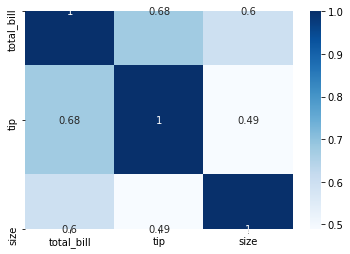

In [35]:
sns.heatmap(tip_corr,annot=True, cmap='Blues')
plt.show()

In [36]:
np.corrcoef(tips['total_bill'],tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

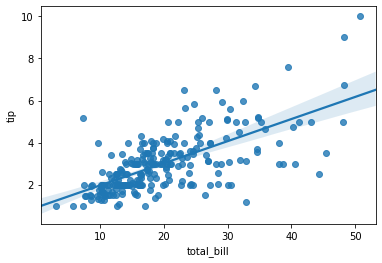

In [38]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()

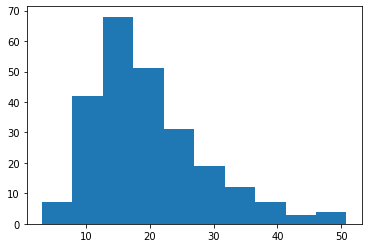

In [39]:
plt.hist(tips.total_bill)
plt.show()

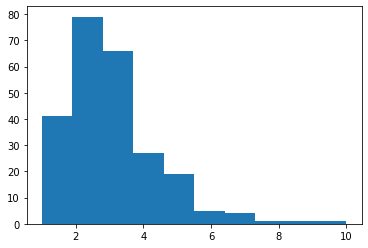

In [40]:
plt.hist(tips.tip)
plt.show()

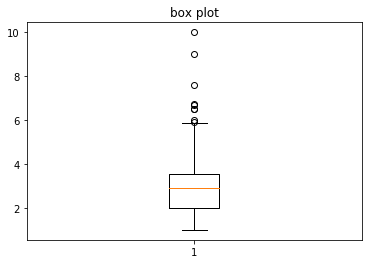

In [44]:
plt.boxplot(tips.tip)
plt.title('box plot')
plt.show()

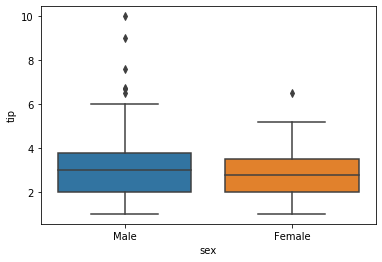

In [45]:
sns.boxplot(x=tips.sex, y=tips.tip)
plt.show()

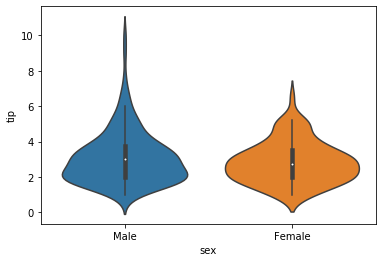

In [46]:
sns.violinplot(x='sex', y='tip', data=tips)

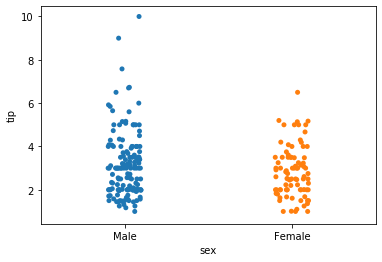

In [50]:
sns.stripplot(x='sex', y='tip', data=tips, jitter=True)
plt.show()

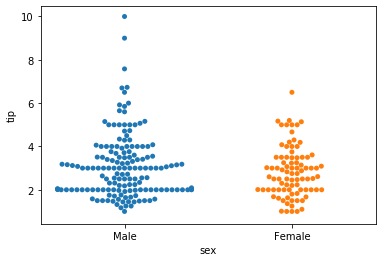

In [49]:
sns.swarmplot(x='sex', y='tip', data=tips)
plt.show()

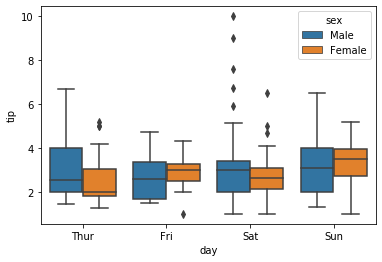

In [54]:
sns.boxplot(x='day', y='tip', data=tips, hue='sex')
plt.show()

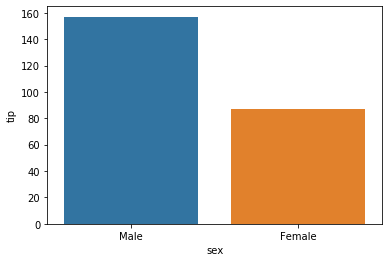

In [58]:
sns.barplot(x=tips.sex, y=tips.tip, estimator=len)
plt.show()

In [57]:
tips.groupby('sex').mean()[['tip']]

,tip
sex,
Male,3.089618
Female,2.833448


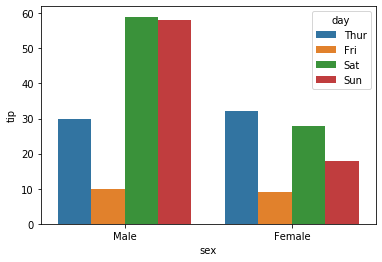

In [59]:
sns.barplot(x='sex', y='tip', estimator=len, hue='day', data=tips)
plt.show()

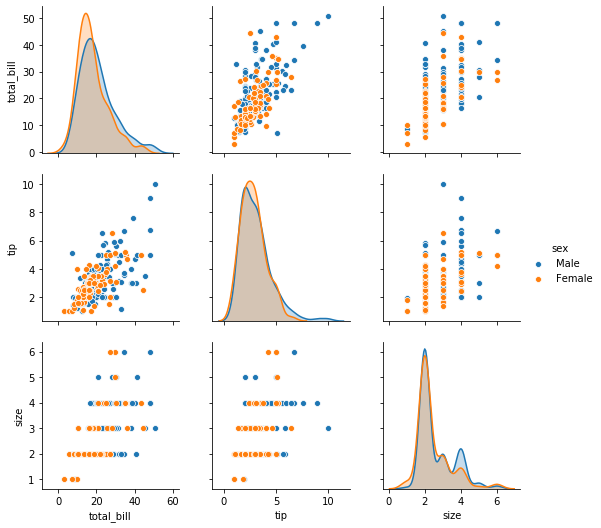

In [62]:
sns.pairplot(tips, hue='sex')
plt.show()

## 과제 
### 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는지 관계 파악

In [10]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


In [64]:
tips.pivot_table('tip_pct','sex','smoker')

smoker,Yes,No
sex,,
Male,0.152771,0.160669
Female,0.182150,0.156921


In [65]:
tips.pivot_table('tip_pct','sex','smoker', aggfunc='count', margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [66]:
tips.groupby('sex')[['tip_pct']].mean()

,tip_pct
sex,
Male,0.157651
Female,0.166491


In [67]:
tips.groupby('smoker')[['tip_pct']].mean()

,tip_pct
smoker,
Yes,0.163196
No,0.159328


In [50]:
a= tips.groupby(['sex','smoker'])[['tip_pct']].describe()

In [51]:
type(a)

pandas.core.frame.DataFrame

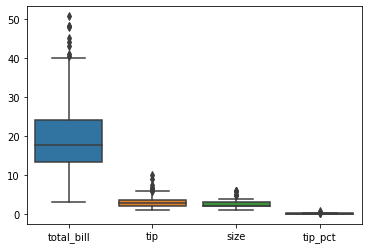

In [11]:
sns.boxplot(data=tips)

In [19]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [35]:
total_bill_IQR = np.quantile(tips.total_bill, 0.75) - np.quantile(tips.total_bill, 0.25)

np.quantile(tips.total_bill, 0.75) + 1.5* total_bill_IQR

40.29749999999999

In [37]:
tip_IQR = np.quantile(tips.tip, 0.75) - np.quantile(tips.tip, 0.25)

np.quantile(tips.tip, 0.75)+ 1.5* tip_IQR

5.906249999999998

In [38]:
new_tips=tips.loc[(tips.total_bill <= 40) &(tips.tip<=5)]

In [40]:
new_tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130338
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [47]:
b=tips.pivot_table('tip_pct',['time','sex','smoker'],'day',
                   aggfunc='sum', fill_value=0)

In [53]:
b

day                       Thur       Fri       Sat       Sun
time   sex    smoker                                        
Lunch  Male   Yes     1.644168  0.522432  0.000000  0.000000
              No      3.314127  0.000000  0.000000  0.000000
       Female Yes     1.141508  0.611188  0.000000  0.000000
              No      3.739542  0.187735  0.000000  0.000000
Dinner Male   Yes     0.000000  0.635410  3.754804  2.609457
              No      0.000000  0.276010  5.188230  6.806499
       Female Yes     0.000000  0.852716  2.457251  0.948299
              No      0.159744  0.142857  1.923915  2.319939

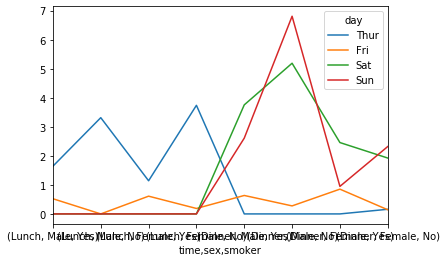

In [52]:
b.plot()

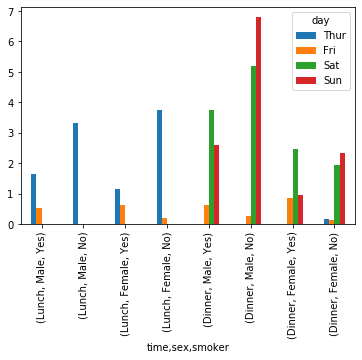

In [54]:
b.plot.bar()

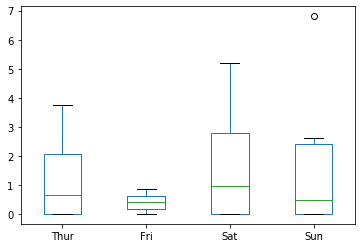

In [55]:
b.plot.box()